In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from math import sin, cos, sqrt, atan2, radians

import query_helper
import json

# Start by loading db into pandas

In [2]:
df = query_helper.query_to_df('''SELECT * FROM routes''')

In [3]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"South Dakota,Custer State Park,Sylvan Lake,Syl...",https://www.mountainproject.com/route/10571472...,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"South Dakota,The Needles Of Rushmore,Mount Rus...",https://www.mountainproject.com/route/10571472...,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"South Dakota,Custer State Park,Cathedral Spire...",https://www.mountainproject.com/route/10571473...,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"South Dakota,Custer State Park,Sylvan Lake,Out...",https://www.mountainproject.com/route/10571473...,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"South Dakota,The Needles Of Rushmore,Mount Rus...",https://www.mountainproject.com/route/10571473...,-103.469,43.8870


In [4]:
df.shape

(36609, 11)

# Initial Data  Cleaning

### Add sub location cols

In [5]:
df['location']=df['location'].apply(lambda x: x.split(','))

In [6]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"[South Dakota, Custer State Park, Sylvan Lake,...",https://www.mountainproject.com/route/10571472...,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"[South Dakota, The Needles Of Rushmore, Mount ...",https://www.mountainproject.com/route/10571472...,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"[South Dakota, Custer State Park, Cathedral Sp...",https://www.mountainproject.com/route/10571473...,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"[South Dakota, Custer State Park, Sylvan Lake,...",https://www.mountainproject.com/route/10571473...,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"[South Dakota, The Needles Of Rushmore, Mount ...",https://www.mountainproject.com/route/10571473...,-103.469,43.8870


In [7]:
df['region'] =0
df['area']=0
df['sub_area']=0
df['wall']=0

In [8]:
#determines length of sub location list and splits them into appropriate columns
def split_list(array, length):
    if length ==5:
        if len(array)>=5:
            return ','.join(array[4:])
        else:
            return 0
    if len(array)>= length:
        return array[length-1]
    else:
        return 0
        

In [9]:
#parse area info (note size varies and we only split into 5 sections)
df.region =df.location.apply(lambda x: split_list(x,2))
df.area =df.location.apply(lambda x: split_list(x,3))
df.sub_area =df.location.apply(lambda x:  split_list(x,4))
df.wall =df.location.apply(lambda x:  split_list(x,5))

#then make location state only
df.location = df.location.apply(lambda x: x[0])

In [10]:
#reorder df for readability
df = df[['id',
'name',
'type',
'rating',
'stars',
'starVotes',
'pitches',
'location',
'region',
'area',
'sub_area',
'wall',
'longitude',
'latitude',
'url',
]]
df.head(20)

,id,name,type,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/10571472...
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/10571472...
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/10571473...
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/10571473...
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571473...
5,105714740,Solitaire,Sport,5.7,4.1,120,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571474...
6,105714743,Star Dancer,"Sport, TR",5.8,4.4,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/10571474...
7,105714746,Solo System,"Sport, TR",5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/10571474...
8,105714749,Weird Water,Trad,5.7,4.8,89,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8824,https://www.mountainproject.com/route/10571474...
9,105714752,Patience,Sport,5.8 X,3.9,16,1,South Dakota,Custer State Park,Tenpins/Switchbacks,Pawn,0,-103.536,43.8394,https://www.mountainproject.com/route/10571475...


### Breakout Climbing type

In [16]:
df.type.value_counts()

Sport                             12993
Boulder                            9809
Trad                               7365
TR                                 1383
Trad, TR                           1346
Trad, Alpine                        772
Sport, TR                           683
Trad, Sport                         562
Trad, Aid                           276
Boulder, Alpine                     211
Ice                                 159
Sport, Alpine                       131
TR, Boulder                          91
Trad, Ice                            67
Aid                                  66
Snow, Alpine                         57
Trad, Mixed, Ice                     47
Trad, Boulder                        42
Sport, Mixed                         39
Trad, Snow, Alpine                   33
Trad, Sport, TR                      32
Trad, Mixed, Ice, Alpine             31
Trad, TR, Alpine                     29
Trad, Ice, Alpine                    25
Ice, Snow, Alpine                    24


In [12]:
df.isna().sum()

id           0
name         0
type         0
rating       0
stars        0
starVotes    0
pitches      0
location     0
region       0
area         0
sub_area     0
wall         0
longitude    0
latitude     0
url          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36609 entries, 0 to 36608
Data columns (total 15 columns):
id           36609 non-null int64
name         36609 non-null object
type         36609 non-null object
rating       36609 non-null object
stars        36609 non-null float64
starVotes    36609 non-null int64
pitches      36609 non-null int64
location     36609 non-null object
region       36609 non-null object
area         36609 non-null object
sub_area     36609 non-null object
wall         36609 non-null object
longitude    36609 non-null float64
latitude     36609 non-null float64
url          36609 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.2+ MB


In [17]:
#fill in blank types as trad (theres only a few)
df.type = df.type.apply(lambda x: 'Trad' if x=='' else x)

In [18]:
df['Sport'] =0
df['Trad']=0
df['Boulder']=0
df['TR']=0
df['Alpine'] =0
df['Aid']=0
df['Ice']=0
df['Snow'] =0
df['Mixed']=0

In [19]:
df['Sport'] =df['type'].apply(lambda x: 1 if 'Sport' in x else 0)
df['Trad']=df['type'].apply(lambda x: 1 if 'Trad' in x else 0)
df['Boulder']=df['type'].apply(lambda x: 1 if 'Boulder' in x else 0)
df['TR']=df['type'].apply(lambda x: 1 if 'TR' in x else 0)
df['Alpine'] =df['type'].apply(lambda x: 1 if 'Alpine' in x else 0)
df['Aid']=df['type'].apply(lambda x: 1 if 'Aid' in x else 0)
df['Ice']=df['type'].apply(lambda x: 1 if 'Ice' in x else 0)
df['Snow'] =df['type'].apply(lambda x: 1 if 'Snow' in x else 0)
df['Mixed']=df['type'].apply(lambda x: 1 if 'Mixed' in x else 0)

In [20]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,region,area,...,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,...,https://www.mountainproject.com/route/10571472...,0,0,1,1,0,0,0,0,0
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,...,https://www.mountainproject.com/route/10571472...,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,...,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,...,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,...,https://www.mountainproject.com/route/10571473...,1,0,0,0,0,0,0,0,0


In [21]:
df.drop(columns='type',inplace=True)

### Look at pitches

In [22]:
df.pitches.value_counts()

 1     17043
 0     15807
 2      1473
 3       756
 4       515
 5       308
 6       200
 8       114
 7       110
 9        62
 10       60
 11       34
 12       32
 15       19
 14       11
 16        9
 13        9
 19        5
 17        5
-1         5
 20        4
 22        4
 18        4
 26        3
 30        2
 35        2
 23        2
 21        2
-7         1
 27        1
 36        1
 28        1
-9         1
 29        1
-2         1
 33        1
 31        1
Name: pitches, dtype: int64

In [23]:
pd.options.display.max_colwidth = 100

In [24]:
df[(df.pitches==0) & (df.Boulder==0)]

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
7,105714746,Solo System,5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,...,https://www.mountainproject.com/route/105714746/solo-system,1,0,0,1,0,0,0,0,0
45,105714992,Mooshy Monster Farts,5.12a,4.5,4,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,...,https://www.mountainproject.com/route/105714992/mooshy-monster-farts,1,0,0,1,0,0,0,0,0
46,105714995,Valdez Overhang,5.9,4.4,85,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Chopping Block,...,https://www.mountainproject.com/route/105714995/valdez-overhang,1,0,0,1,0,0,0,0,0
67,105715277,Evarete,5.7,3.9,23,0,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,https://www.mountainproject.com/route/105715277/evarete,1,0,0,0,0,0,0,0,0
84,105715457,Aging Gracefully,5.7,3.8,30,0,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,https://www.mountainproject.com/route/105715457/aging-gracefully,1,1,0,0,0,0,0,0,0
95,105715565,Wisconson Beef,5.10a,3.6,39,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Chopping Block,...,https://www.mountainproject.com/route/105715565/wisconson-beef,1,0,0,0,0,0,0,0,0
124,105717301,Death Of American Democracy,5.10 A3-4 X,4.7,3,0,Utah,Moab Area,Fisher Towers,Kingfisher,...,https://www.mountainproject.com/route/105717301/death-of-american-democracy,0,0,0,0,0,1,0,0,0
125,105717304,Colorado Northeast Ridge,5.8 C2,4.1,95,0,Utah,Moab Area,Fisher Towers,Kingfisher,...,https://www.mountainproject.com/route/105717304/colorado-northeast-ridge,0,0,0,0,0,1,0,0,0
128,105717316,Robbins Route,5.6 A2 R,4.3,3,0,Utah,Moab Area,Valley of the Gods/Mexican Hat,Mexican Hat,...,https://www.mountainproject.com/route/105717316/robbins-route,0,0,0,0,0,1,0,0,0
135,105717388,Sundevil Chimney,5.9 A3,5.0,7,0,Utah,Moab Area,Fisher Towers,The Titan,...,https://www.mountainproject.com/route/105717388/sundevil-chimney,0,0,0,0,0,1,0,0,0


In [38]:
def pitches_wo_boulders(row):
    if (row['pitches']==0)&(row['Boulder']==0):
        return 1
    else:
        return row['pitches']
    

In [39]:
#change all non boulders with zero to 1 pitch
df.pitches =df.apply(pitches_wo_boulders, axis=1)

In [40]:
# change negative pitch counts to 1
df.pitches =df.pitches.apply(lambda x: 1 if x<0 else x)

In [41]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,0,0,1,1,0,0,0,0,0,R
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,1,0,0,0,0,0,0,0,0,G
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,0,1,0,0,0,0,0,0,0,G
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,0,1,0,0,0,0,0,0,0,G
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,1,0,0,0,0,0,0,0,0,G


### Clean Difficulity Rating

In [42]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

#### Feature Engineer danger column

In [43]:
#add danger column
df['danger'] = 'G'

In [44]:
#parses our difficulty rating and specified substring
#returns grade if boulder or rope passed as catagory
def get_grade_sub(string, catagory):
    words = string.split()
    for word in words:
        if word in diff_grade[catagory]:
            return word
        
    #else we couldn't find the danger grade so return 0 
    if catagory == "Safety":
        return "G"
    #else we couldn't find the difficulty grade so return 0(note this is different from above G rating)
    if (catagory == 'Rope') | (catagory == 'Boulder'):
        return 0

In [45]:
df['danger'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Safety'))

In [46]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,0,0,1,1,0,0,0,0,0,R
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,1,0,0,0,0,0,0,0,0,G
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,0,1,0,0,0,0,0,0,0,G
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,0,1,0,0,0,0,0,0,0,G
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,1,0,0,0,0,0,0,0,0,G


#### Add diff_rating for Rope and Bouldering 

In [47]:
df['rope_grade'] = 0
df['boulder_grade'] = 0

In [49]:
df['rope_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Rope'))
df['boulder_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Boulder'))

In [50]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,1,1,0,0,0,0,0,R,0,V3
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,0,0,0,0,0,0,0,G,5.8,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,0,0,0,0,0,0,0,G,5.7,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,0,0,0,0,0,0,0,G,5.7,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,0,0,0,0,0,0,0,G,5.8,0


In [51]:
###if i want a grade scale use enumerate through diff_grade dict and assign i

#### Give Ratings Ranges

In [52]:
# diff_grade ={
#     "Rope": "3rd\n4th\nEasy 5th\n5.0\n5.1\n5.2\n5.3\n5.4\n5.5\n5.6\n5.7\n5.7+\n5.8-\n5.8\n5.8+\n5.9-\n5.9\n5.9+\n5.10a\n5.10-\n5.10a/b\n5.10b\n5.10\n5.10b/c\n5.10c\n5.10+\n5.10c/d\n5.10d\n5.11a\n5.11-\n5.11a/b\n5.11b\n5.11\n5.11b/c\n5.11c\n5.11+\n5.11c/d\n5.11d\n5.12a\n5.12-\n5.12a/b\n5.12b\n5.12\n5.12b/c\n5.12c\n5.12+\n5.12c/d\n5.12d\n5.13a\n5.13-\n5.13a/b\n5.13b\n5.13\n5.13b/c\n5.13c\n5.13+\n5.13c/d\n5.13d\n5.14a\n5.14-\n5.14a/b\n5.14b\n5.14\n5.14b/c\n5.14c\n5.14+\n5.14c/d\n5.14d\n5.15a\n5.15-\n5.15a/b\n5.15b\n5.15\n5.15c\n5.15+\n5.15c/d\n5.15d",
#     'Boulder': "V-easy\nV0-\nV0\nV0+\nV0-1\nV1-\nV1\nV1+\nV1-2\nV2-\nV2\nV2+\nV2-3\nV3-\nV3\nV3+\nV3-4\nV4-\nV4\nV4+\nV4-5\nV5-\nV5\nV5+\nV5-6\nV6-\nV6\nV6+\nV6-7\nV7-\nV7\nV7+\nV7-8\nV8-\nV8\nV8+\nV8-9\nV9-\nV9\nV9+\nV9-10\nV10-\nV10\nV10+\nV10-11\nV11-\nV11\nV11+\nV11-12\nV12-\nV12\nV12+\nV12-13\nV13-\nV13\nV13+\nV13-14\nV14-\nV14\nV14+\nV14-15\nV15-\nV15\nV15+\nV15-16\nV16-\nV16\nV16+\nV16-17\nV17-\nV17",
#     'Ice': "WI1\nWI2-\nWI2\nWI2+\nWI2-3\nWI3-\nWI3\nWI3+\nWI3-4\nWI4-\nWI4\nWI4+\nWI4-5\nWI5-\nWI5\nWI5+\nWI5-6\nWI6-\nWI6\nWI6+\nWI6-7\nWI7-\nWI7\nWI7+\nWI7-8\nWI8-\nWI8\nAI1\nAI1-2\nAI2\nAI2-3\nAI3\nAI3-4\nAI4\nAI4-5\nAI5\nAI5-6\nAI6",
#     'Aid': "C0\nA0\nC0+\nA0+\nC0-1\nA0-1\nC1-\nA1-\nC1\nA1\nC1+\nA1+\nC1-2\nA1-2\nC2-\nA2-\nC2\nA2\nC2+\nA2+\nC2-3\nA2-3\nC3-\nA3-\nC3\nA3\nC3+\nA3+\nC3-4\nA3-4\nC4-\nA4-\nC4\nA4\nC4+\nA4+\nC4-5\nA4-5\nC5-\nA5-\nC5\nA5\nC5+\nA5+",
#     'Mixed': "M1\nM1+\nM1-2\nM2-\nM2\nM2+\nM2-3\nM3-\nM3\nM3+\nM3-4\nM4-\nM4\nM4+\nM4-5\nM5-\nM5\nM5+\nM5-6\nM6-\nM6\nM6+\nM6-7\nM7-\nM7\nM7+\nM7-8\nM8-\nM8\nM8+\nM8-9\nM9-\nM9\nM9+\nM9-10\nM10-\nM10\nM10+\nM10-11\nM11-\nM11\nM11+\nM12-\nM12\nM12+\nM13-\nM13\nM13+",
#     'Snow': "Easy Snow\nMod. Snow\nSteep Snow",
#     "Safety": "Good protection\nPG13 - Slightly runout\nR - A fall could be dangerous\nX - A fall could be your last",
#     "Mountaineering": "I\nII\nIII\nIV\nV\nVI"
#   }

In [53]:
# for k,v in diff_grade.items():
# #     print(k,v)
#     diff_grade[k] = v.split('\n')

# Write df to csv for ML models

In [54]:
df.to_csv('initial_clean_data.csv')

# Import Libraries & Load Dataframe from AWS DB

In [55]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

In [56]:
# df = pd.read_csv('clean_data.csv')
# pd.set_option('display.max_columns', 50)
# df.rename(columns={'Unnamed: 0':'orig_index'}, inplace=True)
df.set_index('id', inplace=True)
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
id,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,...,1,1,0,0,0,0,0,R,0,V3
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,...,0,0,0,0,0,0,0,G,5.8,0
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,...,0,0,0,0,0,0,0,G,5.7,0
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,...,0,0,0,0,0,0,0,G,5.7,0
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,...,0,0,0,0,0,0,0,G,5.8,0


### Import NLP Data and join to main df

In [57]:
# pd.options.display.max_colwidth = 100

In [58]:
# pd.set_option('display.max_colwidth', -1)

In [59]:
# df_nlp = query_helper.query_to_df('SELECT * FROM route_description;')
# df_nlp.set_index('id', inplace=True)
df_nlp = pd.read_csv('df_nlp.csv',index_col='id')
df_nlp.rename(columns={'info':'infos'}, inplace=True)
df_nlp.at[117568267,'infos'] = ''
df_nlp.head(1)

,infos
id,
105714722,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...


In [60]:
df_full = df.join(df_nlp)
df_full.head(1)

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos
id,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,...,1,0,0,0,0,0,R,0,V3,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...


## Add columns for route description types from NLP

In [61]:
key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'face','flake', 'finger', 'fingers',
             'hand', 'hands', 'arch', 'balancy', 'balance', 'jug', 'squeeze', 'mantel', 'sustained',  
             'ramp', 'overhung', 'dihedral', 'sporty', 'heady', 'pump', 'pumpy', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'exposed', 'exposure',
             'crimp','crimpy', 'vertical', 'slabby', 'cave', 'steep', 'bouldery', 'powerful']

In [62]:
col_key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'face','flake', 'fingers',
                 'jug', 'exposed', 'dihedral', 'sustained', 'technical','run out', 'well protected',
                 'chimney', 'offwidth', 'stem', 'arete','crimp', 'vertical', 'powerful']


In [63]:
# synonym =[]
# for word in key_words:
#     if word in col_key_words:
#         pass
#     else:
#         synonym.append(word)
# synonym

In [64]:
sym_map = {
 'finger':'fingers',
 'hands':'crack',
 'arch': 'roof',
 'balancy':'technical',
 'heady':'run out',
 'pumpy':'sustained',
 'exposure':'exposed',
 'crimpy':'crimp',
 'slabby':'slab',
 'bouldery':'powerful',
 'cave':'roof',
 'overhung':'roof',
 'squeeze':'chimney',
 'steep':'vertical',
 'balance':'technical',
 'mental':'run out',
 'ramp':'slab',
 'mantel':'technical',
 'sporty':'well protected',
 'pump':'sustained',
 'hand':'crack',
 'jam':'crack'
}

#### Start by setting all columns to zero

In [65]:
for adj in col_key_words:
    df_full[adj]=0
df_full.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,...,0,0,0,0,0,0,0,0,0,0
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,...,0,0,0,0,0,0,0,0,0,0
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,...,0,0,0,0,0,0,0,0,0,0
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,...,0,0,0,0,0,0,0,0,0,0
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_full.shape

(36609, 48)

#### For each col assign 1 if col word found in description


In [67]:
for word in col_key_words:
    df_full[word] = df_full['infos'].apply(lambda x: 1 if word in str(x) else 0)

In [68]:
#take care to account for synonyms
for k,v in sym_map.items():
    df_full[v] = df_full['infos'].apply(lambda x: 1 if k in str(x) else 0)

In [69]:
for word in col_key_words:
    print(df_full[word].value_counts())

0    34991
1     1618
Name: slab, dtype: int64
0    32745
1     3864
Name: traverse, dtype: int64
0    36240
1      369
Name: roof, dtype: int64
0    30258
1     6351
Name: corner, dtype: int64
0    34952
1     1657
Name: crack, dtype: int64
0    24474
1    12135
Name: face, dtype: int64
0    33024
1     3585
Name: flake, dtype: int64
0    33249
1     3360
Name: fingers, dtype: int64
0    31403
1     5206
Name: jug, dtype: int64
0    36139
1      470
Name: exposed, dtype: int64
0    33946
1     2663
Name: dihedral, dtype: int64
0    35296
1     1313
Name: sustained, dtype: int64
0    36219
1      390
Name: technical, dtype: int64
0    36435
1      174
Name: run out, dtype: int64
0    36488
1      121
Name: well protected, dtype: int64
0    36210
1      399
Name: chimney, dtype: int64
0    36026
1      583
Name: offwidth, dtype: int64
0    33484
1     3125
Name: stem, dtype: int64
0    31666
1     4943
Name: arete, dtype: int64
0    36129
1      480
Name: crimp, dtype: int64
0    31573


# Making Data Numeric

#### Create numeric df

In [70]:
#use df_numeric as we make data numeric
df_numeric = df_full

#### Catagories to numeric fxn

In [71]:
### make ordinal columns for rope_grade, boulder_grade and danger
def get_rope_grades(grade, catagory):
    for i,match in enumerate(diff_grade[catagory]):
        if match in str(grade):
            return i+1
    return 0    

#### Make grade columns numeric and add in_range column (defaults to True)

In [72]:
df_numeric['rope_grade']=df['rating'].apply(lambda x: get_rope_grades(x,'Rope'))
df_numeric['boulder_grade']=df['rating'].apply(lambda x: get_rope_grades(x,'Boulder'))
df_numeric['danger']=df['rating'].apply(lambda x: get_rope_grades(x,'Safety'))
df_numeric['in_range'] = 1

df_numeric.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful,in_range
id,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,...,0,0,0,0,0,0,0,0,0,1
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,...,0,0,0,0,0,0,0,1,0,1
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,...,0,0,0,0,0,0,0,0,0,1
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,...,0,0,0,0,1,0,0,0,0,1
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,...,0,0,0,0,0,0,0,0,0,1


# General EDA
includes NLP and further cleaned data from models.ipynb

### Load feature data for EDA

In [73]:
sns.set(font_scale=2)

In [74]:
df_eda = pd.read_csv('features.csv')
df_eda.drop(columns=['Unnamed: 0'],inplace=True)
df_eda.head()

,stars,pitches,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,...,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
0,4.4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.6,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.1,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.9,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_eda.drop(columns=['stars', 'pitches','rope_grade','boulder_grade'],inplace=True)
df_eda.head()

,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,...,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
0,0,0,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_eda.columns.values

array(['Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid', 'Ice', 'Snow',
       'Mixed', 'danger', 'slab', 'traverse', 'roof', 'corner', 'crack',
       'face', 'flake', 'fingers', 'jug', 'exposed', 'dihedral',
       'sustained', 'technical', 'run out', 'well protected', 'chimney',
       'offwidth', 'stem', 'arete', 'crimp', 'vertical', 'powerful'],
      dtype=object)

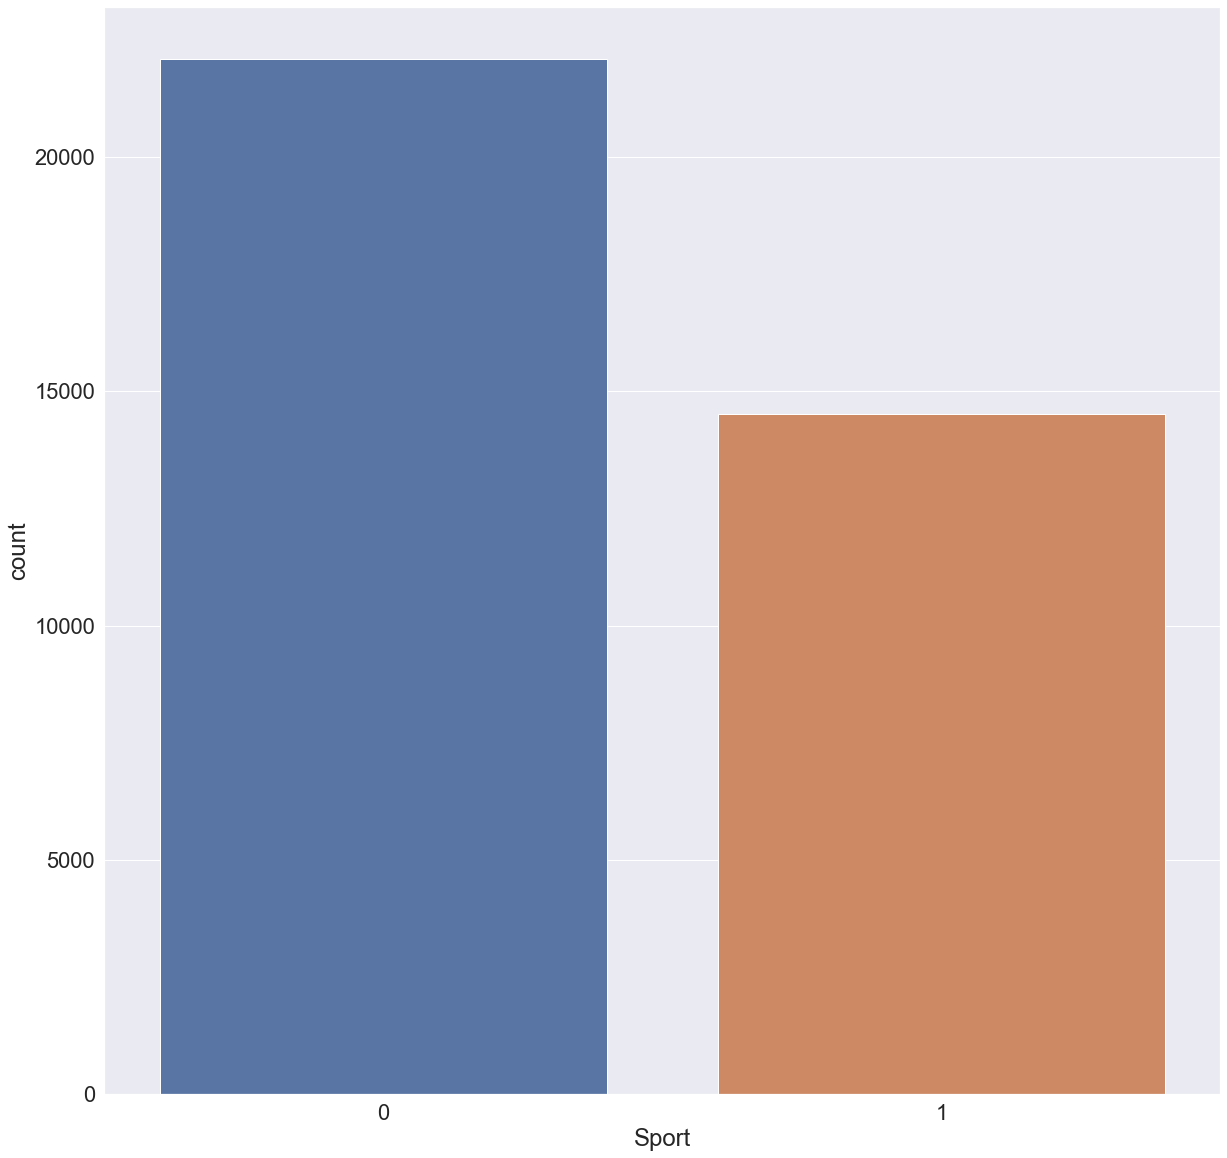

In [77]:
plt.figure(figsize=(20,20))
sns.countplot(df_eda['Sport'])#, 'Trad', 'Boulder', 'TR']])

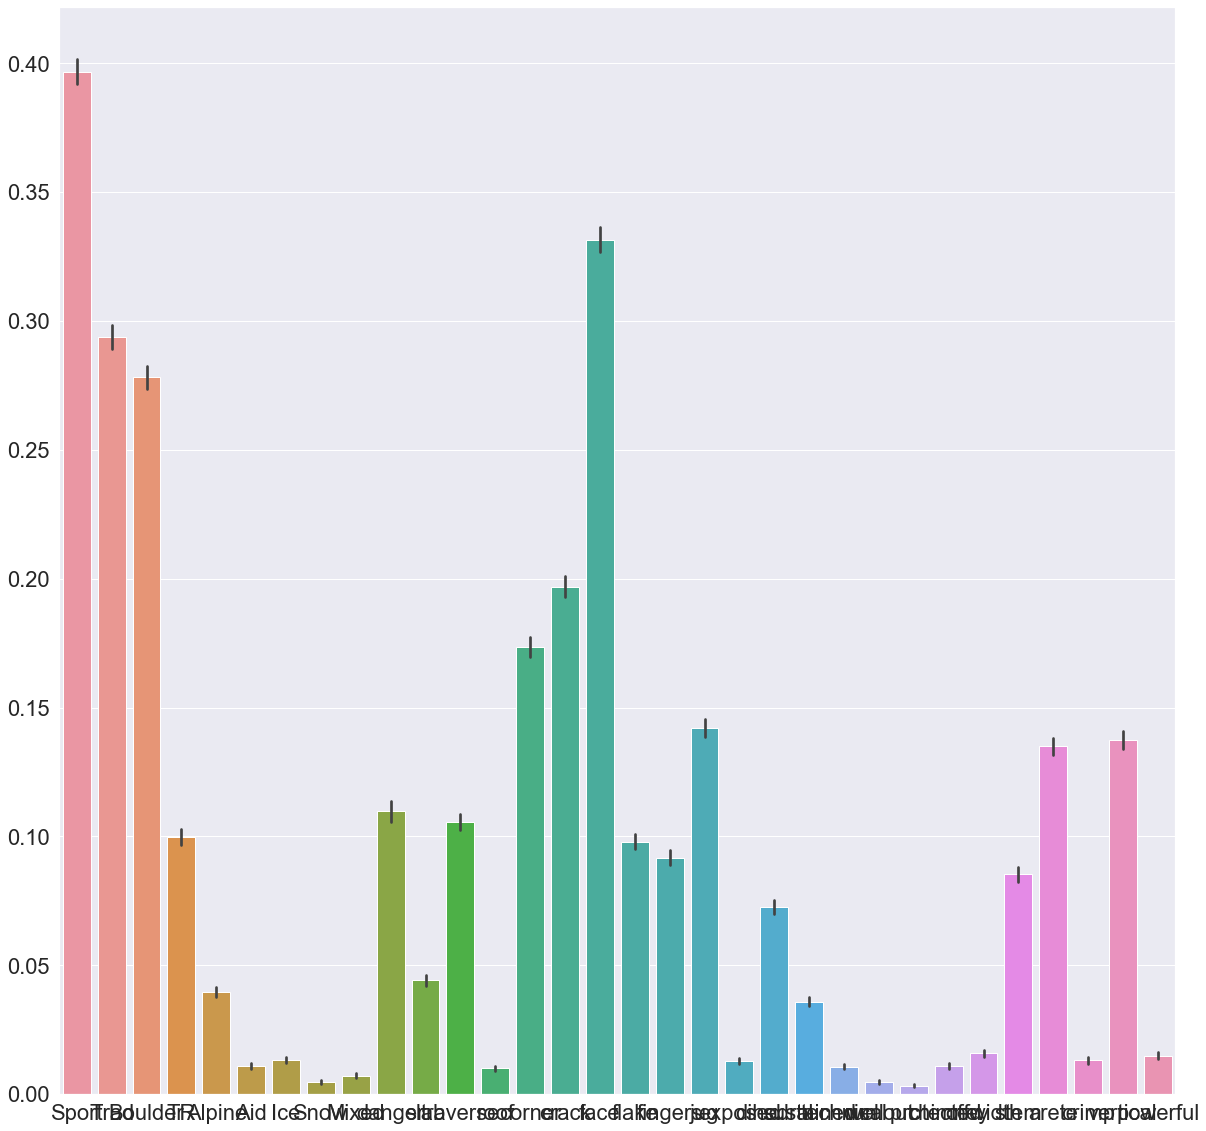

In [78]:
plt.figure(figsize=(20,20))
sns.barplot(data=df_eda)

### Climb Features Distribution

In [79]:
# df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])
df_graph = df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']]

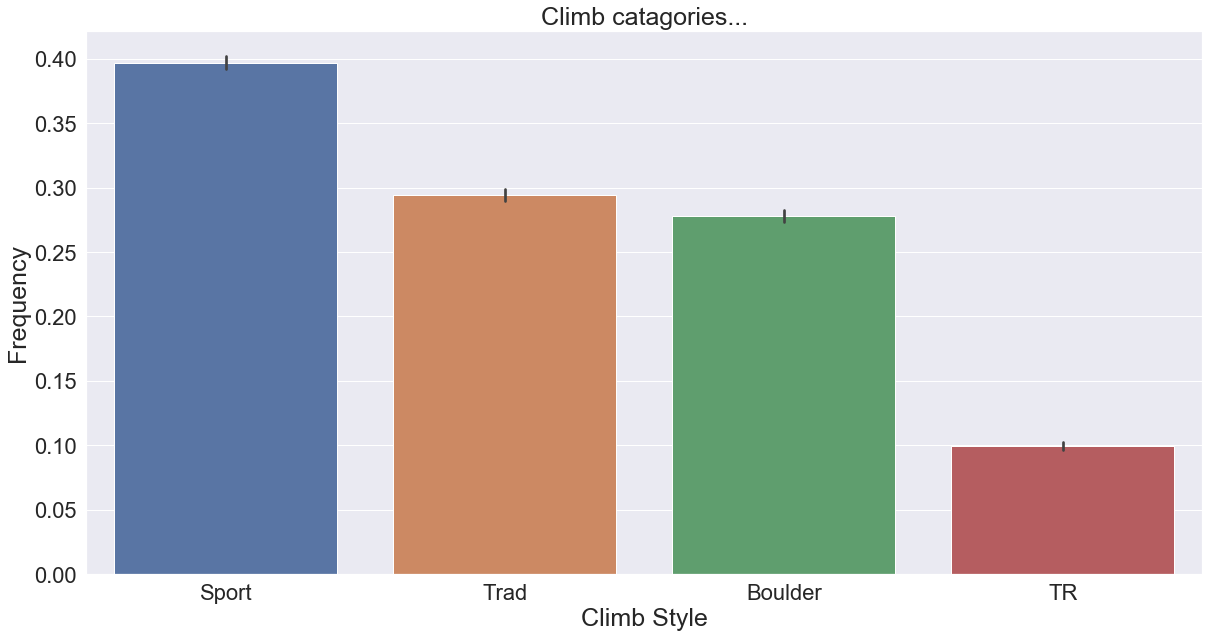

In [80]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df_graph)
plt.title('Climb catagories...',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Frequency',fontsize = 25)
# plt.legend(['No','Yes'])
# plt.set_xlabel(fontsize=20);
plt.savefig('climb_type')

In [81]:
df_graph = pd.melt(df_eda.loc[:,['slab', 'traverse', 'roof', 'corner', 'crack',
       'face', 'flake', 'fingers', 'jug', 'exposed', 'dihedral',
       'sustained', 'technical', 'run out', 'well protected', 'chimney',
       'offwidth', 'stem', 'arete', 'crimp', 'vertical', 'powerful']])

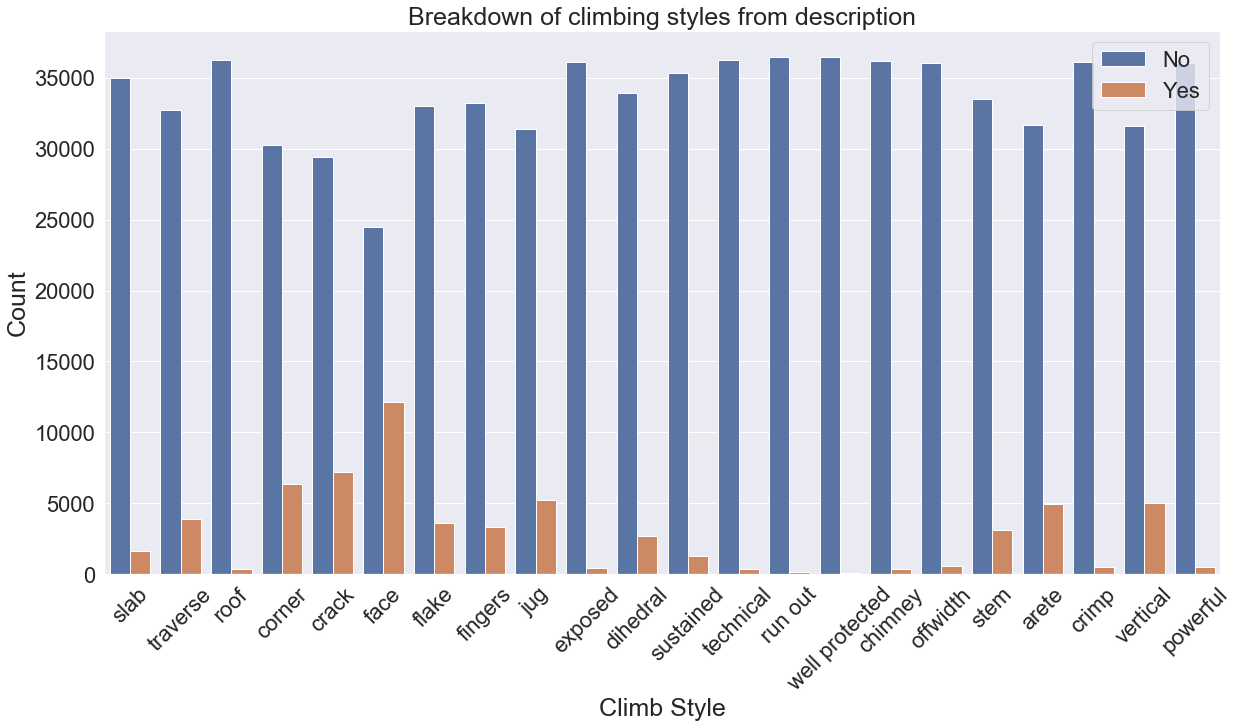

In [82]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="variable", hue="value", data=df_graph)
plt.title('Breakdown of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(['No','Yes'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('climb_description_type')

In [83]:
# sns.factorplot(x='variable', y='value', data=df, kind='bar')

In [84]:
df_numeric[df_numeric.rating.isna()]

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful,in_range
id,,,,,,,,,,,,,,,,,,,,,


In [85]:
df_numeric.describe()

,stars,starVotes,pitches,longitude,latitude,Sport,Trad,Boulder,TR,Alpine,...,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful,in_range
count,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,...,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.0
mean,3.688486,25.277527,1.044251,-105.704041,39.141836,0.396596,0.293971,0.278101,0.099620,0.039744,...,0.004753,0.003305,0.010899,0.015925,0.085362,0.135021,0.013112,0.137562,0.014887,1.0
std,0.818175,59.027575,1.511342,16.242236,3.858649,0.489198,0.455585,0.448070,0.299497,0.195361,...,0.068778,0.057397,0.103829,0.125187,0.279423,0.341751,0.113754,0.344444,0.121103,0.0
min,0.000000,0.000000,0.000000,-124.353000,29.968500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.100000,1.000000,0.000000,-118.571000,36.999200,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.800000,5.000000,1.000000,-110.720000,38.917400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4.100000,24.000000,1.000000,-105.118000,41.187500,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,5.000000,1715.000000,36.000000,-68.207700,51.341600,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


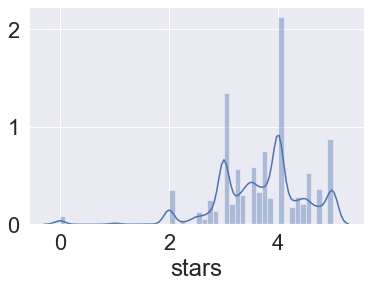

In [86]:
sns.distplot(df_numeric['stars'])

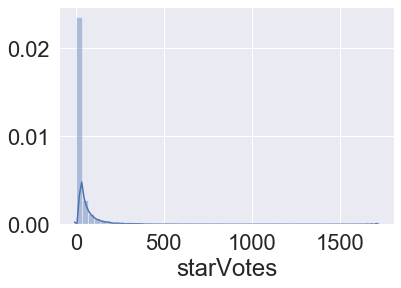

In [87]:
sns.distplot(df_numeric['starVotes'])

In [88]:
df_numeric['pitches'].value_counts()
# plt.xlim(0, 30)     # set the xlim to left, right

1     23017
0      9841
2      1473
3       756
4       515
5       308
6       200
8       114
7       110
9        62
10       60
11       34
12       32
15       19
14       11
13        9
16        9
17        5
19        5
18        4
20        4
22        4
26        3
30        2
35        2
23        2
21        2
36        1
27        1
28        1
33        1
29        1
31        1
Name: pitches, dtype: int64

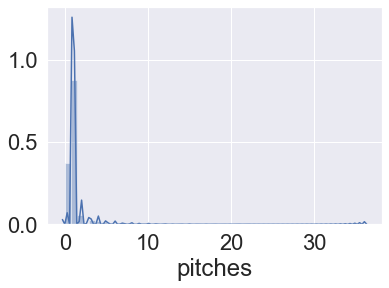

In [89]:
sns.distplot(df_numeric['pitches'])

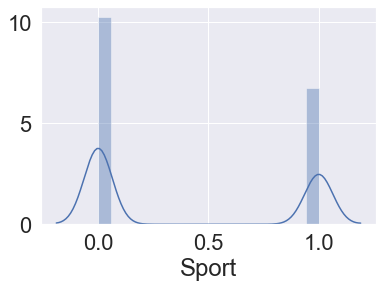

In [90]:
sns.distplot(df_numeric['Sport'])

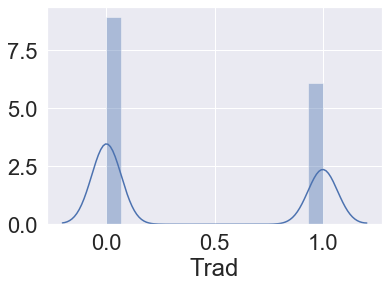

In [91]:
sns.distplot(df_numeric.loc[df_numeric['Boulder']==0,'Trad'])

In [92]:
df_numeric.loc[(df_numeric['Boulder']==0),'name'].count()

26428

In [93]:
df_numeric.loc[(df_numeric['Sport']==1)&(df_numeric['Trad']==1),'name'].count()

622

In [94]:
df_numeric.danger.value_counts()

0    33901
1     1547
2     1012
3      149
Name: danger, dtype: int64

In [95]:
# fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(20,60))
# fig.suptitle('Graphs of Route Descriptions')

# list_of_subplots = np.ravel(axes)

# for ax,col_name in zip(list_of_subplots,features.columns):
#     ax.hist(features[col_name])
#     ax.set_title(f'{col_name} freq')
# fig.savefig('freq_graphs')    #saves fig in current folder

content on modeling notebook

# Write df to csv for ML models

In [96]:
features = df_numeric.loc[:,['stars', 'pitches', 'Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid',
       'Ice', 'Snow', 'Mixed', 'danger', 'rope_grade', 'boulder_grade', 'slab', 'traverse', 'roof', 
                'corner', 'crack', 'face','flake', 'fingers',
                 'jug', 'exposed', 'dihedral', 'sustained', 'technical','run out', 'well protected',
                 'chimney', 'offwidth', 'stem', 'arete','crimp', 'vertical', 'powerful']]

In [99]:
features.to_csv('features_data_1.1.csv')
df_numeric.to_csv('df_numeric.csv')
